In [1]:
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer,Conv2D, Flatten, Dense,UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
import random

Prepare dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.    
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))   
print(x_train.shape,x_test.shape)


(60000, 784) (10000, 784)


Create network 

In [9]:
print("Creating Network...")
input_img = layers.Input(shape=(784,)) #keras.Input(shape=(28, 28, 1))
Encoder = layers.Dense(400, activation='relu')(input_img)
Encoder = layers.Dense(300, activation='relu')(Encoder)
Encoder = layers.Dense(150, activation='relu')(Encoder)
LatentSpace = layers.Dense(65, activation='relu')(Encoder)#buttle neck layer

# Decoder Definition
Decoder = layers.Dense(150, activation='relu')(LatentSpace)
Decoder = layers.Dense(300, activation='relu')(Decoder)
Decoder = layers.Dense(400, activation='relu')(Decoder)
decoded = layers.Dense(784, activation='relu')(Decoder)

Model = keras.Model(input_img, decoded)
Model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
Model.summary()

Creating Network...
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 400)               314000    
                                                                 
 dense_25 (Dense)            (None, 300)               120300    
                                                                 
 dense_26 (Dense)            (None, 150)               45150     
                                                                 
 dense_27 (Dense)            (None, 65)                9815      
                                                                 
 dense_28 (Dense)            (None, 150)               9900      
                                                                 
 dense_29 (Dense)            (None, 300

Recunstruction step

In [15]:
print("Training Network")
history=Model.fit(x_train,x_train,
            epochs=10,
            batch_size=64,
            validation_data=(x_test,x_test),
            )

Training Network
Epoch 1/10
938/938 [==============================] - 43s 45ms/step - loss: 0.2917 - accuracy: 0.0100 - val_loss: 0.2816 - val_accuracy: 0.0092
Epoch 2/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2819 - accuracy: 0.0087 - val_loss: 0.2581 - val_accuracy: 0.0082
Epoch 3/10
938/938 [==============================] - 46s 49ms/step - loss: 0.2657 - accuracy: 0.0096 - val_loss: 0.2938 - val_accuracy: 0.0102
Epoch 4/10
938/938 [==============================] - 51s 55ms/step - loss: 0.2640 - accuracy: 0.0082 - val_loss: 0.2586 - val_accuracy: 0.0090
Epoch 5/10
938/938 [==============================] - 47s 51ms/step - loss: 0.2627 - accuracy: 0.0109 - val_loss: 0.2594 - val_accuracy: 0.0086
Epoch 6/10
938/938 [==============================] - 44s 47ms/step - loss: 0.2669 - accuracy: 0.0096 - val_loss: 0.2618 - val_accuracy: 0.0071
Epoch 7/10
938/938 [==============================] - 47s 50ms/step - loss: 0.2684 - accuracy: 0.0088 - val_loss: 0.264

accuracy and test report for reconstruction step

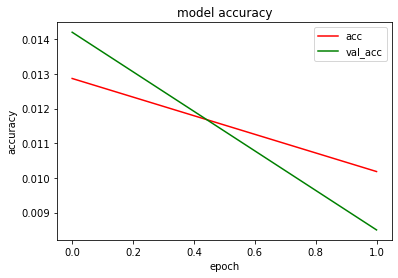

In [13]:
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

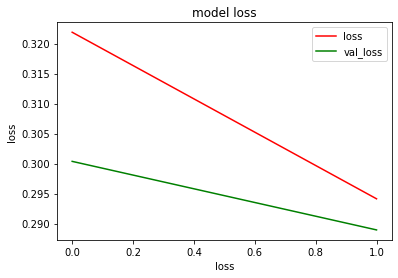

In [14]:
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('loss')
plt.legend()
plt.show()

Displaying 0 to 9 images

In [ ]:
def Display(Coded_Image,Reconstructed_Image,Original_Image):
    print("Showing Images")
    plt.figure(figsize=(20, 2))
    # Input
    ax = plt.subplot(1, 3, 1)
    plt.imshow(Damaged_Image.reshape(28, 28))
    plt.gray()
    plt.title("Damages_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Original Image
    ax = plt.subplot(1, 3, 2)
    plt.imshow(Original_Image.reshape(28, 28))
    plt.gray()
    plt.title("Original_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #Recovered
    ax = plt.subplot(1, 3, 3)
    plt.imshow(Recovered_Image.reshape(28, 28))
    plt.gray()
    plt.title("Recovered_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()

for i in [0,1,2,3,4,5,6,7,8,9]:
    recovered= Model.predict(x_test[i])
    Display( fault_images[i], recovered , originals[i])